# Linear regression exercise

In [1]:
import os
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pylab as pl
from IPython import display

# Part 1 - Fitting a line

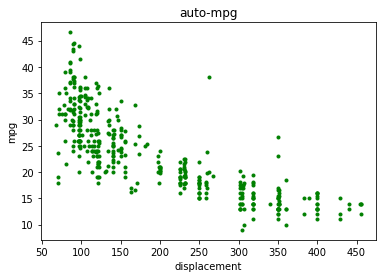

In [3]:
usecols = {0,1,2,3, 4,5,6}
converters = {3: lambda s: float(s.strip() != '?' or 0)}
auto_mpg = np.loadtxt('../../datasets/regression/auto-mpg/auto-mpg.data', converters=converters, usecols=usecols)

x = auto_mpg[:,2]
y = auto_mpg[:,0]

plt.title('auto-mpg')
plt.ylabel('mpg')
plt.xlabel('displacement')
plt.plot(x,y,'.g')

# Solution

68.0 455.0


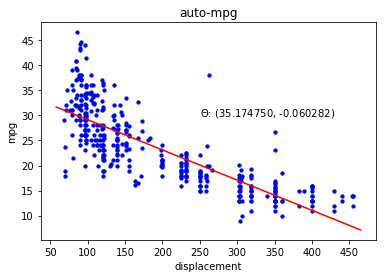

In [21]:
def linear_regression_vector_calculus(x, y):
    X = np.ones([len(x), 2])
    X[:,1] = x
    Y = np.ones([len(y), 1])
    Y[:,0] = y

    XtX = np.dot(X.T, X)
    XtY = np.dot(X.T, Y)

    theta = np.dot(np.linalg.inv(XtX), XtY)
    return theta[0], theta[1]

x = auto_mpg[:,2]
y = auto_mpg[:,0]

print np.min(x), np.max(x)

t0, t1 = linear_regression_vector_calculus(x, y)

plt.title('auto-mpg')
plt.ylabel('mpg')
plt.xlabel('displacement')
plt.plot(x,y,'.')
y_estimate1 = t0 + t1*np.linspace(np.min(x)-10,np.max(x)+10,10)
plt.text(250, 30, '$\Theta$: (%f, %f)' % (t0, t1))
plt.plot(x,y,'b.')
plt.plot(np.linspace(np.min(x)-10,np.max(x)+10,10),y_estimate1,'r')

# Part 2 - Fitting a plane

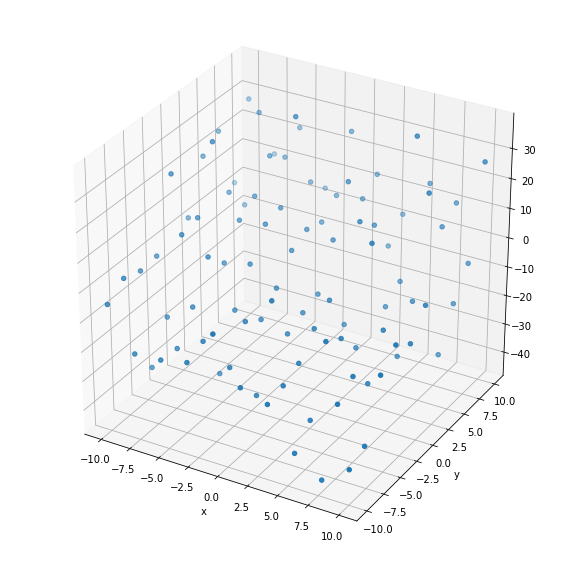

In [25]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10,10)
y = np.linspace(-10,10,10)
X, Y = np.meshgrid(x, y)

# Equation of a plane
# A X + B Y + C Z + D = 0
A, B, C, D = 1, -2, 1, 3
mu, sigma = 0, 8
Z = np.random.normal(0,10,X.shape) + (- A * X - B * Y - D) / C

data_X = X
data_Y = Y
data_Z = Z

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.scatter(X, Y, Z, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Solution

(100, 3) (100, 1)


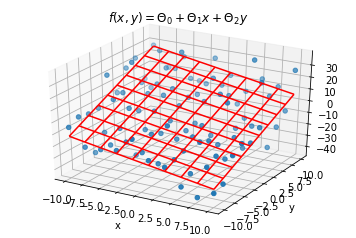

In [26]:
y = np.ravel(data_Y)
x = np.ravel(data_X)
z = np.ravel(data_Z)

X = np.vstack([np.ones(x.shape), x, y]).T
Y = np.vstack([z]).T
print X.shape, Y.shape

XtX = np.dot(X.T, X)
XtY = np.dot(X.T, Y)
theta = np.dot(np.linalg.inv(XtX), XtY)

x = np.linspace(-10,10,10)
y = np.linspace(-10,10,10)
X, Y = np.meshgrid(x, y)

Z_estimated = (theta[1] * X + theta[2] * Y + theta[0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(data_X, data_Y, Z_estimated, rstride=1, cstride=1, color='r')
ax.scatter(X, Y, data_Z, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x,y) = \Theta_0 + \Theta_1 x + \Theta_2  y$')